In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:
from qiskit import *
cq = QuantumRegister(2,'code_qubit')
lq = QuantumRegister(1,'ancilla_qubit')
qc = QuantumCircuit(cq,lq)
qc.cx(cq[0],lq[0])
qc.cx(cq[1],lq[0])
print(qc)

                         
 code_qubit_0: ──■───────
                 │       
 code_qubit_1: ──┼────■──
               ┌─┴─┐┌─┴─┐
ancilla_qubit: ┤ X ├┤ X ├
               └───┘└───┘


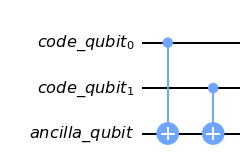

In [4]:
qc.draw(output='mpl')

In [5]:
%pip install qiskit-ignis

  Using cached qiskit_ignis-0.7.1-py3-none-any.whl (198 kB)
Note: you may need to restart the kernel to use updated packages.


In [6]:
from qiskit.ignis.verification.topological_codes import RepetitionCode
from qiskit.ignis.verification.topological_codes import GraphDecoder
from qiskit.ignis.verification.topological_codes import lookuptable_decoding, postselection_decoding

/tmp/ipykernel_59/2472739805.py:1: DeprecationWarning: The qiskit.ignis package is deprecated and has been supersceded by the qiskit-experiments project. Refer to the migration guide: https://github.com/Qiskit/qiskit-ignis#migration-guide on how to migrate to the new project.
  from qiskit.ignis.verification.topological_codes import RepetitionCode


In [7]:
d = 3
T = 2
code = RepetitionCode(d,T)

In [8]:
code.qubit_registers

{'code_qubit', 'link_qubit'}

In [9]:
code.code_qubit

QuantumRegister(3, 'code_qubit')

In [10]:
for log in ['0','1']:
    print('\n========= logical',log,'=========\n')
    print( code.circuit[log] )


========= logical 0 =========

                    ┌───┐     ┌───┐     ┌─┐   ┌───┐     ┌───┐        ┌─┐      »
      link_qubit_0: ┤ X ├─────┤ X ├─────┤M├───┤ X ├─────┤ X ├────────┤M├──────»
                    └─┬─┘┌───┐└─┬─┘┌───┐└╥┘┌─┐└─┬─┘┌───┐└─┬─┘┌───┐   └╥┘┌─┐   »
      link_qubit_1: ──┼──┤ X ├──┼──┤ X ├─╫─┤M├──┼──┤ X ├──┼──┤ X ├────╫─┤M├───»
                      │  └─┬─┘  │  └─┬─┘ ║ └╥┘  │  └─┬─┘  │  └─┬─┘┌─┐ ║ └╥┘   »
      code_qubit_0: ──■────┼────┼────┼───╫──╫───■────┼────┼────┼──┤M├─╫──╫────»
                           │    │    │   ║  ║        │    │    │  └╥┘ ║  ║ ┌─┐»
      code_qubit_1: ───────■────■────┼───╫──╫────────■────■────┼───╫──╫──╫─┤M├»
                                     │   ║  ║                  │   ║  ║  ║ └╥┘»
      code_qubit_2: ─────────────────■───╫──╫──────────────────■───╫──╫──╫──╫─»
                                         ║  ║                      ║  ║  ║  ║ »
round_0_link_bit_0: ═════════════════════╩══╬══════════════════════╬══╬══╬══╬═»
        

In [11]:
empty_code = RepetitionCode(3,0)

In [13]:
def print_circuits(code):
    for log in ['0','1']:
        print('\n========= logical',log,'=========\n')
        print( code.circuit[log] )

print_circuits(empty_code)


========= logical 0 =========

              
link_qubit_0: 
              
link_qubit_1: 
              
code_qubit_0: 
              
code_qubit_1: 
              
code_qubit_2: 
              

========= logical 1 =========

                   
link_qubit_0: ─────
                   
link_qubit_1: ─────
              ┌───┐
code_qubit_0: ┤ X ├
              ├───┤
code_qubit_1: ┤ X ├
              ├───┤
code_qubit_2: ┤ X ├
              └───┘


In [14]:
empty_code.syndrome_measurement()
print_circuits(empty_code)


========= logical 0 =========

                    ┌───┐     ┌───┐     ┌─┐   
      link_qubit_0: ┤ X ├─────┤ X ├─────┤M├───
                    └─┬─┘┌───┐└─┬─┘┌───┐└╥┘┌─┐
      link_qubit_1: ──┼──┤ X ├──┼──┤ X ├─╫─┤M├
                      │  └─┬─┘  │  └─┬─┘ ║ └╥┘
      code_qubit_0: ──■────┼────┼────┼───╫──╫─
                           │    │    │   ║  ║ 
      code_qubit_1: ───────■────■────┼───╫──╫─
                                     │   ║  ║ 
      code_qubit_2: ─────────────────■───╫──╫─
                                         ║  ║ 
round_0_link_bit_0: ═════════════════════╩══╬═
                                            ║ 
round_0_link_bit_1: ════════════════════════╩═
                                              

========= logical 1 =========

                         ┌───┐     ┌───┐     ┌─┐   
      link_qubit_0: ─────┤ X ├─────┤ X ├─────┤M├───
                         └─┬─┘┌───┐└─┬─┘┌───┐└╥┘┌─┐
      link_qubit_1: ───────┼──┤ X ├──┼──┤ X ├─╫─┤M├
                    ┌──

In [15]:
empty_code.x()
print_circuits(empty_code)


========= logical 0 =========

                    ┌───┐     ┌───┐          ┌─┐   
      link_qubit_0: ┤ X ├─────┤ X ├──────────┤M├───
                    └─┬─┘┌───┐└─┬─┘┌───┐     └╥┘┌─┐
      link_qubit_1: ──┼──┤ X ├──┼──┤ X ├──────╫─┤M├
                      │  └─┬─┘  │  └─┬─┘┌───┐ ║ └╥┘
      code_qubit_0: ──■────┼────┼────┼──┤ X ├─╫──╫─
                           │    │    │  ├───┤ ║  ║ 
      code_qubit_1: ───────■────■────┼──┤ X ├─╫──╫─
                                     │  ├───┤ ║  ║ 
      code_qubit_2: ─────────────────■──┤ X ├─╫──╫─
                                        └───┘ ║  ║ 
round_0_link_bit_0: ══════════════════════════╩══╬═
                                                 ║ 
round_0_link_bit_1: ═════════════════════════════╩═
                                                   

========= logical 1 =========

                         ┌───┐     ┌───┐          ┌─┐   
      link_qubit_0: ─────┤ X ├─────┤ X ├──────────┤M├───
                         └─┬─┘┌───┐└─┬─┘┌─

In [16]:
empty_code.readout()
print_circuits(empty_code)


========= logical 0 =========

                    ┌───┐     ┌───┐          ┌─┐            
      link_qubit_0: ┤ X ├─────┤ X ├──────────┤M├────────────
                    └─┬─┘┌───┐└─┬─┘┌───┐     └╥┘┌─┐         
      link_qubit_1: ──┼──┤ X ├──┼──┤ X ├──────╫─┤M├─────────
                      │  └─┬─┘  │  └─┬─┘┌───┐ ║ └╥┘┌─┐      
      code_qubit_0: ──■────┼────┼────┼──┤ X ├─╫──╫─┤M├──────
                           │    │    │  ├───┤ ║  ║ └╥┘┌─┐   
      code_qubit_1: ───────■────■────┼──┤ X ├─╫──╫──╫─┤M├───
                                     │  ├───┤ ║  ║  ║ └╥┘┌─┐
      code_qubit_2: ─────────────────■──┤ X ├─╫──╫──╫──╫─┤M├
                                        └───┘ ║  ║  ║  ║ └╥┘
round_0_link_bit_0: ══════════════════════════╩══╬══╬══╬══╬═
                                                 ║  ║  ║  ║ 
round_0_link_bit_1: ═════════════════════════════╩══╬══╬══╬═
                                                    ║  ║  ║ 
        code_bit_0: ════════════════════════════════╩

In [17]:
circuits = code.get_circuit_list()
job = execute( circuits, Aer.get_backend('qasm_simulator') )
raw_results = {}
for log in ['0','1']:
    raw_results[log] = job.result().get_counts(log)
    print('\n========= logical',log,'=========\n')
    print(raw_results[log])


========= logical 0 =========

{'000 00 00': 1024}

========= logical 1 =========

{'111 00 00': 1024}


In [18]:
code.process_results( raw_results )

{'0': {'0 0  00 00 00': 1024}, '1': {'1 1  00 00 00': 1024}}

In [19]:
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors import pauli_error, depolarizing_error

def get_noise(p_meas,p_gate):

    error_meas = pauli_error([('X',p_meas), ('I', 1 - p_meas)])
    error_gate1 = depolarizing_error(p_gate, 1)
    error_gate2 = error_gate1.tensor(error_gate1)

    noise_model = NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_meas, "measure")
    noise_model.add_all_qubit_quantum_error(error_gate1, ["u1", "u2", "u3"])
    noise_model.add_all_qubit_quantum_error(error_gate2, ["cx"])

    return noise_model

In [20]:
noise_model = get_noise(0.04,0.04)

In [21]:
def get_syndrome(code,noise_model,shots=1014):

    circuits = code.get_circuit_list()

    job = execute( circuits, Aer.get_backend('qasm_simulator'),noise_model=noise_model, shots=shots )
    raw_results = {}
    for log in ['0','1']:
        raw_results[log] = job.result().get_counts(log)

    return code.process_results( raw_results )

In [22]:
get_syndrome(code,noise_model)

{'0': {'0 1  01 00 00': 1,
  '0 0  00 10 01': 2,
  '1 1  10 00 01': 1,
  '1 1  00 01 10': 1,
  '1 1  00 10 01': 2,
  '1 1  00 00 11': 1,
  '1 0  01 10 10': 1,
  '1 0  01 00 00': 1,
  '1 0  00 01 11': 1,
  '1 0  00 11 01': 1,
  '1 0  10 10 10': 1,
  '0 0  11 01 10': 1,
  '0 1  01 01 10': 1,
  '0 1  00 10 00': 3,
  '0 1  00 00 10': 3,
  '0 1  10 11 00': 3,
  '1 1  10 11 01': 1,
  '0 0  01 00 01': 5,
  '0 1  01 01 01': 4,
  '0 0  10 11 01': 7,
  '0 0  00 01 10': 19,
  '0 1  10 10 01': 2,
  '0 0  01 01 00': 57,
  '0 0  01 10 11': 1,
  '0 0  00 00 11': 41,
  '0 1  00 01 00': 10,
  '0 0  10 11 10': 1,
  '0 0  10 10 00': 47,
  '0 0  10 01 00': 2,
  '0 1  00 00 01': 31,
  '0 0  00 00 00': 565,
  '1 0  00 10 11': 3,
  '0 0  01 11 01': 2,
  '0 0  11 00 00': 1,
  '1 0  00 10 00': 17,
  '1 0  01 01 10': 2,
  '0 0  01 11 10': 3,
  '1 0  00 00 01': 2,
  '0 0  01 01 11': 3,
  '1 0  00 00 10': 36,
  '0 0  11 10 10': 2,
  '0 0  01 10 00': 8,
  '0 0  00 01 01': 27,
  '1 0  00 01 00': 2,
  '0 0  00 10 10

In [23]:
dec = GraphDecoder( RepetitionCode(4,2) )

In [24]:
dec.matching('1 0  001 100 100')

'1 1'

In [25]:
for d in range(3,8):

    code = RepetitionCode(d,2)

    results = get_syndrome(code,noise_model=noise_model,shots=8192)

    dec = GraphDecoder(code)

    logical_prob_match = dec.get_logical_prob(results)
    logical_prob_lookup = lookuptable_decoding(results,results)
    logical_prob_post = postselection_decoding(results)

    for log in ['0','1']:
        print('d =',d,',log =',log)
        print('logical error probability for matching      =',logical_prob_match[log])
        print('logical error probability for lookup table  =',logical_prob_lookup[log])
        print('logical error probability for postselection =',logical_prob_post[log])
        print('')
    print('')

d = 3 ,log = 0
logical error probability for matching      = 0.031494140625
logical error probability for lookup table  = 0.0201416015625
logical error probability for postselection = 0.00022291573785109228

d = 3 ,log = 1
logical error probability for matching      = 0.031494140625
logical error probability for lookup table  = 0.0201416015625
logical error probability for postselection = 0.00022366360993066427


d = 4 ,log = 0
logical error probability for matching      = 0.0198974609375
logical error probability for lookup table  = 0.0079345703125
logical error probability for postselection = 0.0

d = 4 ,log = 1
logical error probability for matching      = 0.020263671875
logical error probability for lookup table  = 0.0074462890625
logical error probability for postselection = 0.0


d = 5 ,log = 0
logical error probability for matching      = 0.010498046875
logical error probability for lookup table  = 0.0023193359375
logical error probability for postselection = 0.0

d = 5 ,log = 1